# load the dataet and proccess data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# explore the data

In [15]:
data=pd.read_csv('25RP19438.csv')
data

,Unnamed: 0,Temperature,Crop_Yield
0,0,27.483571,58.922301
1,1,24.308678,44.070420
2,2,28.238443,63.490857
3,3,32.615149,58.221043
4,4,23.829233,50.592752
...,...,...,...
115,115,26.507737,56.185069
116,116,24.826441,39.527169
117,117,19.156610,39.245491
118,118,30.714114,58.119296


In [16]:
data.columns

Index(['Unnamed: 0', 'Temperature', 'Crop_Yield'], dtype='object')

# separate the data into features

In [17]:
x=data[['Temperature']]
y=data['Crop_Yield']

# split the data into training

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# train the model 

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
prediction =model.predict(x_test)
prediction


array([34.89359761, 61.0302457 , 47.72017021, 59.73310361, 38.2696607 ,
       58.50902049, 66.26162199, 45.35698346, 57.74564038, 51.93324675,
       40.77411631, 38.72998798, 45.33315143, 52.28665417, 55.42435619,
       60.11824931, 49.36638603, 55.25373003, 44.67314506, 48.47126787,
       64.11346088, 42.71381706, 69.22647107, 53.85890766])

# make predictions

In [21]:
y_train_pred = model.predict(x_train)  
y_test_pred=model.predict(x_test)

# Evaluate the Model

In [22]:
mse_train =mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred) 
print('Training MSE',mse_train)
print('Testing MSE ',mse_test)
print('Training R² Score ',r2_score_train)
print('Testing R² Score ',r2_score_test)

Training MSE 22.152323848957312
Testing MSE  37.75854544001958
Training R² Score  0.8025918031728353
Testing R² Score  0.7167858894077912


# save the best performing model

In [23]:
import pickle
filename='25RP19438.sav'
pickle.dump(model,open(filename,'wb'))

# visualize the regression line

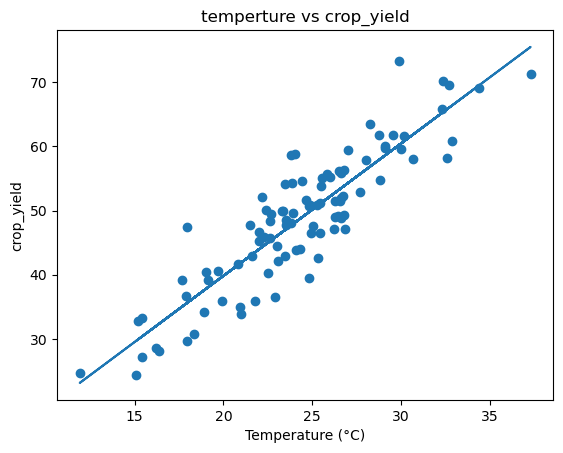

In [24]:
plt.scatter(x_train,y_train) 
plt.plot(x_train,y_train_pred) 
plt.title('temperture vs crop_yield')
plt.xlabel("Temperature (°C)")
plt.ylabel('crop_yield')
plt.show()

# deployment of the model